<a href="https://colab.research.google.com/github/Dhruvjain484/ML_projects_for_beginners/blob/main/Student%20Performance/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
dataset = pd.read_csv('student-mat.csv')

In [47]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [48]:
dataset.shape

(395, 33)

In [49]:
dataset['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

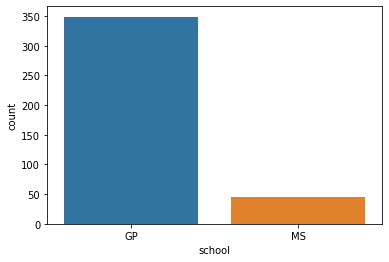

In [50]:
sns.countplot(data = dataset, x = 'school')

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [52]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [53]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [54]:
def extract_columns(df):
  cat_col = [col for col in df.columns if df[col].dtype =='O']  
  num_col = [col for col in df.columns if df[col].dtype !='O']  
  return cat_col, num_col


In [55]:
Cat_col, num_col = extract_columns(dataset)

In [56]:
Cat_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [57]:
cat_col = ['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [58]:
type(cat_col)

list

In [59]:
num_col

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [60]:
for i in cat_col:
  print(i , 'has these as unique values', dataset[i].unique())
  print('\n')

school has these as unique values ['GP' 'MS']


sex has these as unique values ['F' 'M']


address has these as unique values ['U' 'R']


famsize has these as unique values ['GT3' 'LE3']


Pstatus has these as unique values ['A' 'T']


Mjob has these as unique values ['at_home' 'health' 'other' 'services' 'teacher']


Fjob has these as unique values ['teacher' 'other' 'services' 'health' 'at_home']


reason has these as unique values ['course' 'other' 'home' 'reputation']


schoolsup has these as unique values ['yes' 'no']


famsup has these as unique values ['no' 'yes']


paid has these as unique values ['no' 'yes']


activities has these as unique values ['no' 'yes']


nursery has these as unique values ['yes' 'no']


higher has these as unique values ['yes' 'no']


internet has these as unique values ['no' 'yes']


romantic has these as unique values ['no' 'yes']




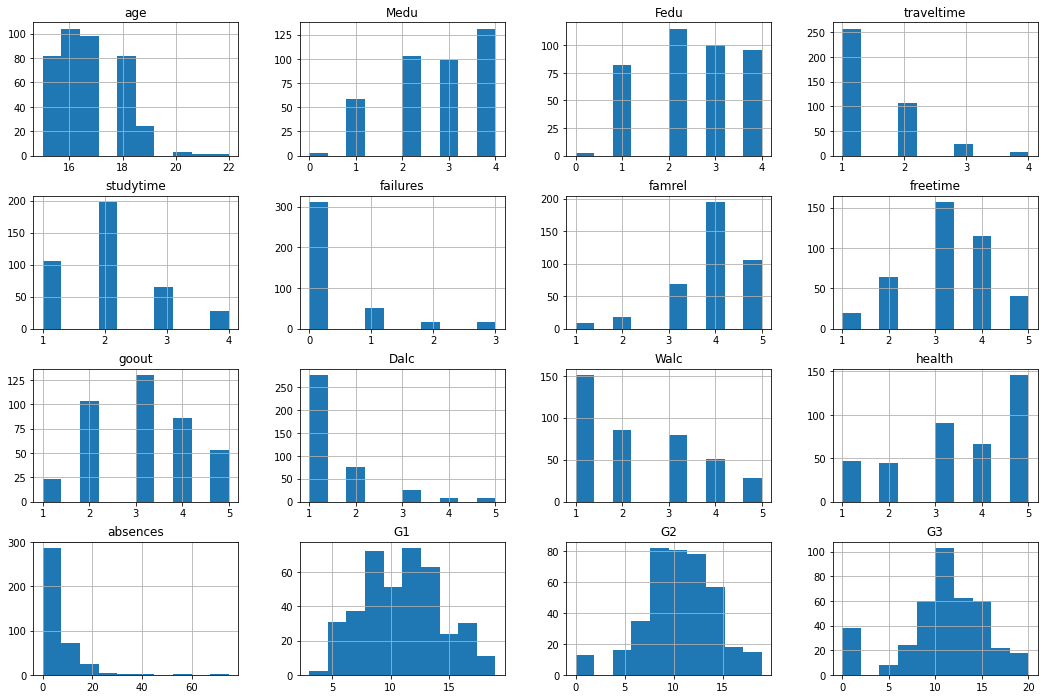

In [61]:
dataset[num_col].hist(figsize = (18, 12));

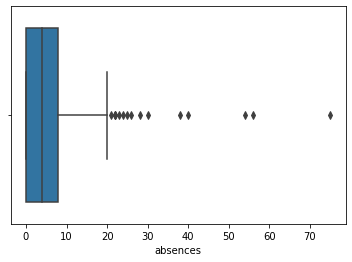

In [62]:
sns.boxplot(x = dataset['absences'])

In [63]:
dataset['absences'] = np.where(dataset['absences']>=60,dataset['absences'].median(), dataset['absences'] )

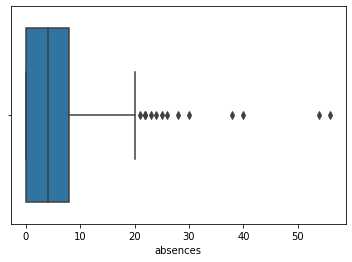

In [64]:
sns.boxplot(x = dataset['absences'])

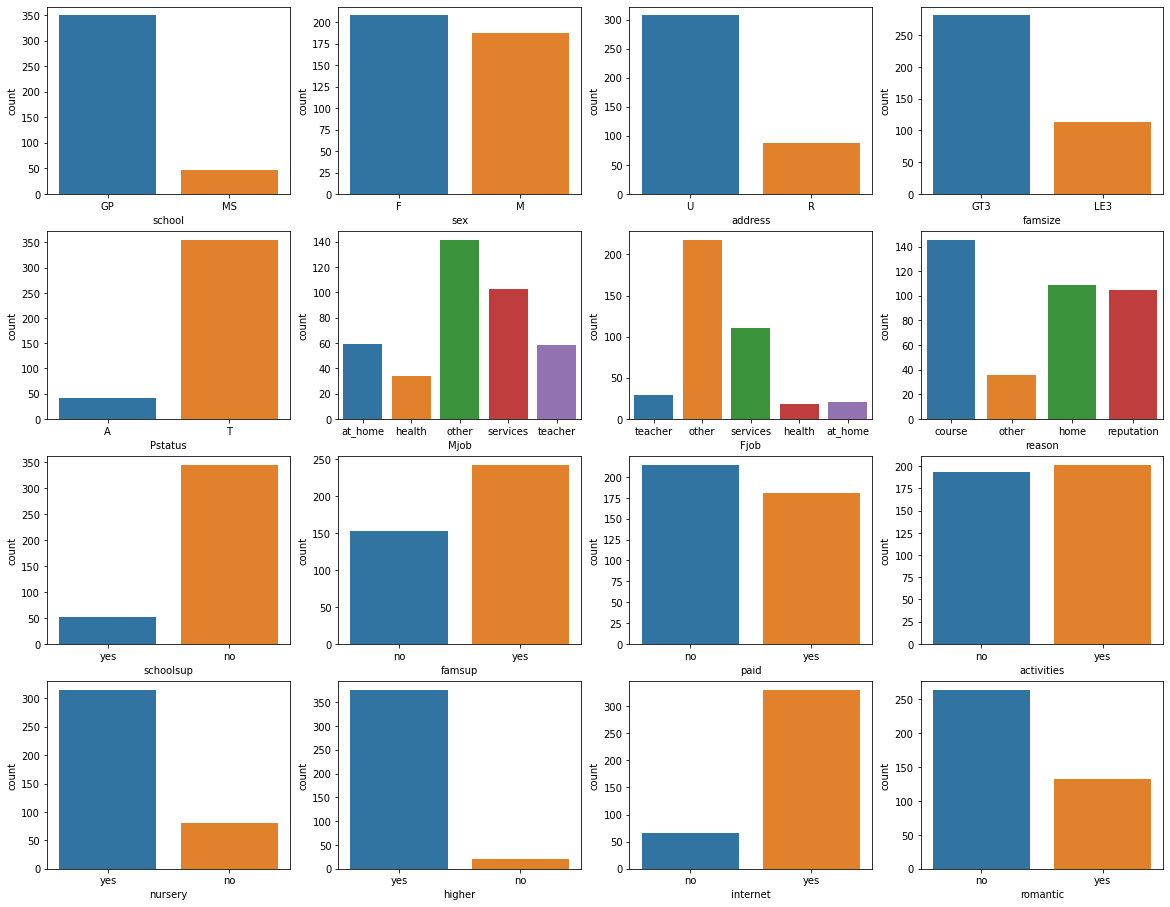

In [65]:
plt.figure(figsize = (20, 20))
for i, feature in enumerate(cat_col):
  plt.subplot(5, 4, i+1)
  sns.countplot(data = dataset, x = feature);

In [66]:
dataset.drop(columns = 'guardian', axis = 1, inplace = True)

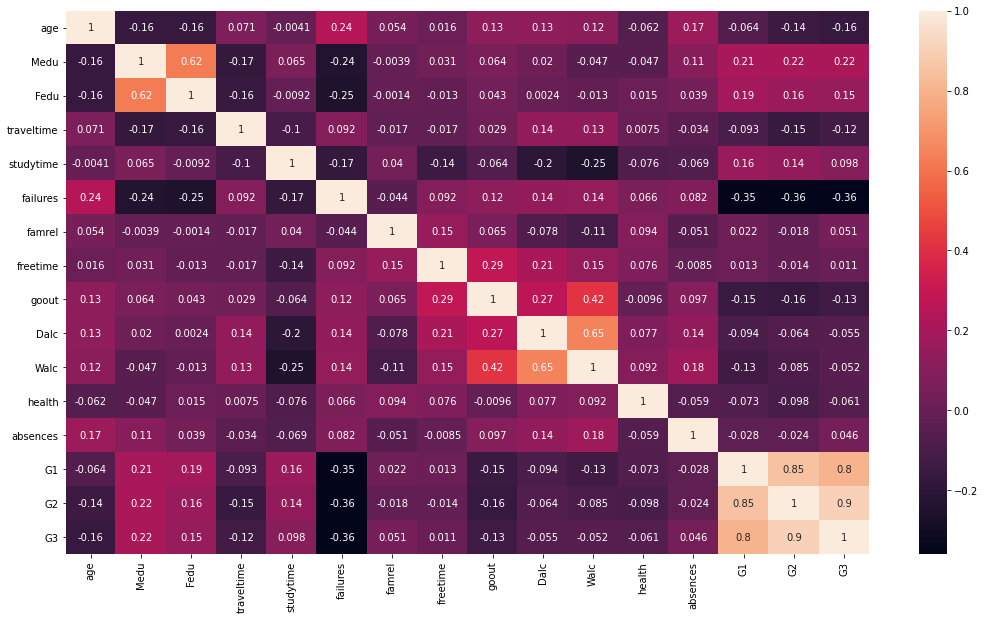

In [67]:
plt.figure(figsize = (18, 10))
sns.heatmap(dataset.corr(), annot = True)

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_col:
  dataset[col] = encoder.fit_transform(dataset[col])

In [69]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6.0,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4.0,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10.0,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2.0,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,0,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11.0,9,9,9
391,1,1,17,1,1,1,3,1,3,3,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3.0,14,16,16
392,1,1,21,0,0,1,1,1,2,2,0,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3.0,10,8,7
393,1,1,18,0,1,1,3,2,3,2,0,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0.0,11,12,10


In [70]:
#feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [71]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 31:]


In [72]:
ordered_features = SelectKBest(score_func = chi2, k = 20)
ordered_feature = ordered_features.fit(X, y)

In [73]:
ordered_feature.scores_

array([ 10.31067797,  10.58166219,   2.27776186,   5.87611299,
        12.4296898 ,   1.71114959,  13.89485215,  10.37556313,
        14.80709871,   5.01367018,  29.72412494,   6.75815116,
         6.23160348, 140.93489812,  28.31901793,   5.30343831,
        16.1298998 ,   7.60104871,   3.2970835 ,   1.23447862,
         2.99914225,  20.08952572,   2.11068612,   4.47946459,
        10.47249433,  17.08286838,  28.44416652,  10.17666783,
       585.61652544, 319.71642692, 451.68095212])

In [74]:
ordered_feature = pd.DataFrame(ordered_feature.scores_, columns = ['Score'])
ordered_feature

,Score
0,10.310678
1,10.581662
2,2.277762
3,5.876113
4,12.429690
5,1.711150
6,13.894852
7,10.375563
8,14.807099
9,5.013670


In [75]:
x_new = pd.DataFrame(X.columns, columns = ['Feature'])
x_new

,Feature
0,school
1,sex
2,age
3,address
4,famsize
5,Pstatus
6,Medu
7,Fedu
8,Mjob
9,Fjob


In [76]:
features_rank = pd.concat((x_new, ordered_feature), axis =1)
features_rank.nlargest(10, 'Score')

,Feature,Score
28,absences,585.616525
30,G2,451.680952
29,G1,319.716427
13,failures,140.934898
10,reason,29.724125
26,Walc,28.444167
14,schoolsup,28.319018
21,romantic,20.089526
25,Dalc,17.082868
16,paid,16.129900


In [77]:
columns = features_rank.nlargest(10, 'Score')['Feature'].values
columns

array(['absences', 'G2', 'G1', 'failures', 'reason', 'Walc', 'schoolsup',
       'romantic', 'Dalc', 'paid'], dtype=object)

In [78]:
best_feature = dataset[columns]
best_feature

,absences,G2,G1,failures,reason,Walc,schoolsup,romantic,Dalc,paid
0,6.0,6,5,0,0,1,1,0,1,0
1,4.0,5,5,0,0,1,0,0,1,0
2,10.0,8,7,3,2,3,1,0,2,1
3,2.0,14,15,0,1,1,0,1,1,1
4,4.0,10,6,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
390,11.0,9,9,2,0,5,0,0,4,1
391,3.0,16,14,0,0,4,0,0,3,0
392,3.0,8,10,3,0,3,0,0,3,0
393,0.0,12,11,0,0,4,0,0,3,0


In [79]:
dataset_new = pd.concat((best_feature, y), axis = 1)
dataset_new


,absences,G2,G1,failures,reason,Walc,schoolsup,romantic,Dalc,paid,G3
0,6.0,6,5,0,0,1,1,0,1,0,6
1,4.0,5,5,0,0,1,0,0,1,0,6
2,10.0,8,7,3,2,3,1,0,2,1,10
3,2.0,14,15,0,1,1,0,1,1,1,15
4,4.0,10,6,0,1,2,0,0,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...
390,11.0,9,9,2,0,5,0,0,4,1,9
391,3.0,16,14,0,0,4,0,0,3,0,16
392,3.0,8,10,3,0,3,0,0,3,0,7
393,0.0,12,11,0,0,4,0,0,3,0,10


In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(best_feature, y, random_state = 0, test_size = 0.25)

In [81]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components= 2)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

In [82]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)


[11:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [83]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred), 1)
y_pred = y_pred.round()

In [84]:
y_test = np.array(y_test)

In [85]:
np.concatenate((y_test, y_pred), 1)

array([[14., 14.],
       [10., 12.],
       [ 9., 10.],
       [15., 16.],
       [16., 16.],
       [12., 13.],
       [14., 13.],
       [11., 11.],
       [ 9., 10.],
       [15., 15.],
       [10.,  8.],
       [11., 11.],
       [10., 11.],
       [ 8.,  9.],
       [15., 15.],
       [14., 14.],
       [12., 13.],
       [ 0.,  9.],
       [10.,  9.],
       [16., 15.],
       [ 0.,  4.],
       [ 0.,  1.],
       [ 8.,  3.],
       [16., 15.],
       [12., 12.],
       [15., 17.],
       [10., 10.],
       [19., 19.],
       [ 0.,  0.],
       [14., 13.],
       [ 0., -1.],
       [10.,  8.],
       [ 8.,  9.],
       [ 4.,  6.],
       [13., 13.],
       [10., 10.],
       [13., 13.],
       [18., 18.],
       [ 8.,  7.],
       [11., 12.],
       [ 6.,  5.],
       [18., 19.],
       [ 8.,  8.],
       [ 8.,  9.],
       [11., 10.],
       [ 0., -1.],
       [13., 12.],
       [ 0.,  0.],
       [13., 12.],
       [ 7.,  5.],
       [10., 10.],
       [18., 18.],
       [10.,

In [86]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.8487067846947897